<a href="https://colab.research.google.com/github/Koki-Kazaore/Machine-Learning/blob/main/MLIL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import re
from keras.utils import np_utils

# セルフで追加
import cv2


#自作データの作成

In [ ]:
def list_pictures(directory, ext='jpg|jpeg|bmp|png|ppm'):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if re.match(r'([\w]+\.(?:' + ext + '))', f.lower())]

In [ ]:
"""
データセットを作る

具体的には2つ
・X : 「縦の画素数 * 横の画素数 * チャンネル数 *データの数」のarray(配列)
 ※チャンネル数はグレースケールは'1', カラーは'3'
・Y : onehotベクトル *データの数

"""

X = [] # 画像データセットをいれる箱
Y = [] # ラベルデータセットをいれる箱

"""
＜ディレクトリについて＞

今, AとBの2つのクラスを分類するとします。

Aの画像は, 'class_A'というフォルダの下に
Bの画像は, 'class_B'というフォルダの下に
あります.

＜以降の処理の説明＞
class_Aの下にある画像を, 
先頭から, 1個ずつロードして, 箱Xに末尾から追加していきます.
箱YにはクラスAのラベルを示す「0」の値を, 画像と同じ数追加します.

そのあと, 
class_Bの下にある画像を, 
先頭から, 1個ずつロードして, 箱Xに末尾から追加していきます.
箱YにはクラスBのラベルを示す「1」の値を, 画像と同じ数追加します.

つまり最終的には, 
XにはクラスAの画像とクラスBの画像が,
Yには「0」がクラスAの画像データ数コ, 「1」がクラスBの画像データ数コ
入っている状態になります.


"""



# クラスAの画像
for picture in list_pictures('./class_A/'): # クラスAの画像を1コ拾って, 下の処理を実行. を繰り返す
    
    img = img_to_array(load_img(picture, target_size=(64,64))) # 拾った画像をarrayに変換


    X.append(img) # 箱Xに追加

    Y.append(0) # 箱Yに追加


# クラスBの画像 (Aと同様です)
for picture in list_pictures('./class_B/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(1)

# 箱Xと箱Yをlist型にしてるので, これをCNNが扱いやすいarray型に変換します
# ※ 注意!!! : 箱の中身はarrayですが, 箱自体がlist型なのでこの処理が必要です

# listをarrayに変換
X = np.asarray(X)
Y = np.asarray(Y)



In [ ]:
print(X.shape, Y.shape)

(0,) (0,)


In [ ]:

# 画素値を0～1の範囲に変換
X = X.astype('float32')   # 下の割り算のために要素を全部 float32にする
X = X / 255.0   # 最大の濃度地255ですべての濃度値を割る

"""
Yの中身をone-hotベクトルに変換します

つまり
クラスA →　[1, 0]
クラスB → [0, 1]
と形を変えます. 
こちらのほうがCNNが理解しやすいためです. 

もっと言えば, 
箱Yのなかの
「0」を「[1, 0]」に
「1」を「[0, 1]」に  します.

"""

# onehotに変換
Y = np_utils.to_categorical(Y, 2)

"""
次に, 学習データとテストデータを分割しています
必要ないならコメントアウトしてください.
"""
# 学習用データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=111)


"""
ここまでで, データの前処理は終わりです.
以下のデータが出来上がりました.

X_train : 学習画像のデータセット
X_test : テスト画像のデータセット
y_train : 学習画像のデータセットに対応した, ラベルデータセット
y_test : テスト画像のデータセットに対応した, ラベルデータセット

あとはCNNにこれらを渡します.
"""


ValueError: ignored

#MNIST

In [ ]:
from keras.datasets import mnist

In [ ]:
# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNISTデータを加工する
x_train  = x_train.reshape(60000, 28, 28, 1)
x_test   = x_test.reshape(10000, 28, 28, 1)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = np_utils.to_categorical(y_train, 10)
y_test   = np_utils.to_categorical(y_test, 10)

In [ ]:
X_train = x_train
X_test = x_test


print(X_train.shape)

#Cifar10

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# MNISTデータを加工する

x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = np_utils.to_categorical(y_train, 10)
y_test   = np_utils.to_categorical(y_test, 10)

# データの水増し

In [4]:
x_new = []
y_new = []

for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 15):
        # 回転させる
        center = (16, 16) # 回転の中心点
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)

        """
        RAMの容量不足のためコメントアウト
        # さらに左右反転させる
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)
        """

# 水増しした画像を学習用に置き換える
print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))

水増し前= 50000
水増し後= 200000


# 微修正

In [5]:
X_train = x_train
X_test = x_test



print(X_train.shape)

(200000, 32, 32, 3)


#モデル定義

In [6]:
"""
ここでは
CNNへのモデルの渡し方を説明するために, 
適当にCNNを構築してます

ここは, 自身のモデルに合わせて作ってください.
"""
# CNNを構築してみる
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:])) 
# (3, 3)の部分がカーネルサイズ。後ろの方に行くにつれ大きくするとうまくいきやすい
model.add(Activation('relu'))
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (9, 9)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))       # クラスは2個なので, 出力層のニューロン数は2つになってます
model.add(Activation('softmax'))

# 作ったCNNモデルをコンパイルします
# SGDは最小勾配法を意味する。Adamなどを使うのも一つの手
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


#モデルで学習

In [7]:
# 実行時間43分

"""
上で作ったモデルで学習データをトレーニングします.
トレーニングにはfit関数が使われます.
"""

"""
＜データをCNNに渡すには＞

fit関数の引数に学習データを突っ込むだけでOKです.

前処理で作成した学習データである X_train, y_train を
fit関数に入れます.

"""
history = model.fit(X_train, 
                    y_train, 
                    batch_size=1000, epochs=10,
                   validation_data = (X_test, y_test), verbose = 0)

ResourceExhaustedError: ignored

In [8]:
from keras.metrics import accuracy
print(history.history["accuracy"][-1])

0.7746099829673767


In [9]:
# こっちの精度を向上させることが目的
print(history.history["val_accuracy"][-1])
# 初期値：0.26969999074935913
# 最大値：0.2775999903678894（データを２倍に水増し）
# 最大値：0.4219000041484833（エポック数を10→100に増加）
# 0.3472000062465668（エポック数10, データを３倍に水増し）
# 0.39559999108314514（エポック数10, データを４倍に水増し）
# データを５倍に水増しした時点でクラッシュ
# 最大値：0.6740999817848206（エポック数を10→100に増加 && データを４倍に水増し）（実行時間43m）
# 0.3921999931335449(エポック数10, データを４倍に水増し, カーネルサイズを3->3->4->5に増加)
# 0.3831000030040741(エポック数10, データを４倍に水増し, カーネルサイズを3->3->5->7に増加)
# 0.3880000114440918(エポック数10, データを４倍に水増し, カーネルサイズを3->4->5->6に増加)
# 0.42800000309944153(エポック数10, データを４倍に水増し, カーネルサイズを3->5->7->9に増加)
# 最大値：0.7842000126838684（エポック数10, データを４倍に水増し, カーネルサイズを3->5->7->9に増加, optimizerをSGDからAdamに変更）


0.7842000126838684


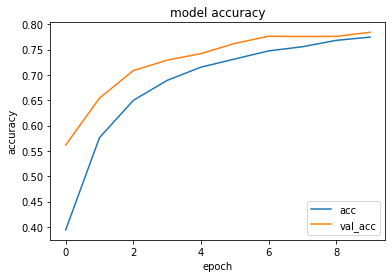

In [10]:
"""
ここは余談です.

上で学習した内容を可視化してます.
"""


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

In [11]:
"""
モデルでテストデータを予測(predict)をします. 
いわゆるテストのことです

"""

"""
テストでは, まず
CNNにテストデータのみを与え, それぞれの予測ラベルを返してもらいます.

これは
predictの引数に, X_testを突っ込むことで, 
予測値が返ってきます.

"""

# X_testを突っ込んで, 予測値を返す
predict_x = model.predict(X_test) 

# 最も高い予測値となったラベルを返す, 
# つまり, 最も可能性の高い予測ラベルを返します.
classes_x = np.argmax(predict_x,axis=1)

# 予測ラベルを出力してみます. 入力したテスト画像ごとに, その予測ラベルを返してくれるはずです.
print(classes_x)

[3 8 8 ... 5 4 7]


対策方法

① データの加工（前処理）

      ・量子化（あまりおすすめしない）/ ノイズを減らすイメージ
      ・水増し

② モデルの構築

      ・畳み込みConv
      ・層を増やす。層の種類を変える。
      ・パラメタを変える（カーネル、ニューロン数）
      ・CNN以外でもよい（CNNが制度上がりやすいためおすすめ）
      ・どろっぷあうと
③ 学習

      ・学習回数
      ・バッチサイズ（データサイズの１０分の１が最適といわれている）
      ・最適化手法をかえる
      ・損失関数（MSE・交差エントロピー）